  #                                                    FASHION CLOTHING RECOMMENDER SYSTEM

Group members:

*  Onesphoro Kibunja
*  Bernadette Wanjiku Nganga
*  Caleb Ochieng

# 1. INTRODUCTION

In [1]:
#we'll do that later

# 2. Data Exploration and Preprocessing

2.1 Overview of the Dataset

We start by opening the dataset and just have an overal view and check basic info  such as shape, column names, data type among others so as to give us a better understanding on how we will have to clean it.

In [21]:
# Importing necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gzip
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from sklearn.feature_extraction.text import TfidfVectorizer
# # from surprise import Dataset, Reader
# # from surprise.model_selection import train_test_split as surprise_train_test_split
# # from surprise import accuracy
# import nltk
# from nltk.corpus import stopwords
# from sklearn.preprocessing import OneHotEncoder
# import tensorflow as tf
# import datetime
# import re

In [22]:
#Checking the dataset

# Specify the path to your compressed JSON file
json_file_path = 'renttherunway_final_data.json.gz'

# Open the compressed JSON file using gzip and load it into a Pandas DataFrame
with gzip.open(json_file_path, 'rt') as f:
    df = pd.read_json(f, lines=True)

In [23]:
# Preview our dataframe
df.head()

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


In [24]:
#Checking information on the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   fit             192544 non-null  object 
 1   user_id         192544 non-null  int64  
 2   bust size       174133 non-null  object 
 3   item_id         192544 non-null  int64  
 4   weight          162562 non-null  object 
 5   rating          192462 non-null  float64
 6   rented for      192534 non-null  object 
 7   review_text     192544 non-null  object 
 8   body type       177907 non-null  object 
 9   review_summary  192544 non-null  object 
 10  category        192544 non-null  object 
 11  height          191867 non-null  object 
 12  size            192544 non-null  int64  
 13  age             191584 non-null  float64
 14  review_date     192544 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 22.0+ MB


We note that `weight` column is object data type. This is due to the presence of strings to show the units. We will have to change this column to int to make it easier to work with the numbers

In [25]:
#Checking shape of the dataset
df.shape

(192544, 15)

In [26]:
# Check on NaN values
df.isnull().sum()

fit                   0
user_id               0
bust size         18411
item_id               0
weight            29982
rating               82
rented for           10
review_text           0
body type         14637
review_summary        0
category              0
height              677
size                  0
age                 960
review_date           0
dtype: int64

The dataset has a number of missing values in different columns which we will clean up later on.

In [27]:
df.columns

Index(['fit', 'user_id', 'bust size', 'item_id', 'weight', 'rating',
       'rented for', 'review_text', 'body type', 'review_summary', 'category',
       'height', 'size', 'age', 'review_date'],
      dtype='object')

We also notice some of the column names have line spaces and others have underscores. We will rectify that so as to have uniformity on the column names.

In [19]:
df.describe()

,user_id,item_id,rating,size,age
count,192544.000000,1.925440e+05,192462.000000,192544.000000,191584.000000
mean,499494.100149,1.045684e+06,9.092371,12.245175,33.871017
std,289059.719328,8.053148e+05,1.430044,8.494877,8.058083
min,9.000000,1.233730e+05,2.000000,0.000000,0.000000
25%,250654.250000,1.950760e+05,8.000000,8.000000,29.000000
50%,499419.000000,9.483960e+05,10.000000,12.000000,32.000000
75%,750974.000000,1.678888e+06,10.000000,16.000000,37.000000
max,999997.000000,2.966087e+06,10.000000,58.000000,117.000000


The `age` and `size` column have a minimum value of **0**. This is not feasible in real life and hence we will need to change those values. Furthermore the max value for `age` is **117**. Although a possibilty this seems most unlikely to be the case for this dataset.

      2.2 Data cleaning 


We start by changing the column name structure for consistency

In [28]:
df.columns

Index(['fit', 'user_id', 'bust size', 'item_id', 'weight', 'rating',
       'rented for', 'review_text', 'body type', 'review_summary', 'category',
       'height', 'size', 'age', 'review_date'],
      dtype='object')

In [29]:
# Change linespace to underscore
df.rename(columns = {
   "bust size": "bust_size",
   "rented for": "rented_for",
   "body type" : "body_type"}, inplace=True)

# Confirm our changes
df.columns

Index(['fit', 'user_id', 'bust_size', 'item_id', 'weight', 'rating',
       'rented_for', 'review_text', 'body_type', 'review_summary', 'category',
       'height', 'size', 'age', 'review_date'],
      dtype='object')


*     2.2.1 Handling Missing Values

We then check the number of missing values in all the columns and deal with each in the best way possible.

In [30]:
# Check NaN values
df.isnull().sum()

fit                   0
user_id               0
bust_size         18411
item_id               0
weight            29982
rating               82
rented_for           10
review_text           0
body_type         14637
review_summary        0
category              0
height              677
size                  0
age                 960
review_date           0
dtype: int64

As seen above, our data has missing values on the following columns `bust_size`, `weight`,`rating`,`rented_for`,`body type`, `height` and `age`. 

We start with the `rating` and `rented_for` columns. The number of rows with missing data is extremely low. We will drop these rows as they will have no significant statistical impact on our analysis.

In [11]:
#dropping missing values for 'rating' and 'rented_for' columns
df.dropna(subset=['rating', 'rented_for'], inplace=True)


# df.reset_index(drop=True, inplace=True)

#checking missing values
df.isnull().sum()

fit                   0
user_id               0
bust_size         18394
item_id               0
weight            29957
rating                0
rented_for            0
review_text           0
body_type         14637
review_summary        0
category              0
height              677
size                  0
age                 959
review_date           0
dtype: int64

Now lets handle missing values for other columns.

In [31]:
df['bust_size'].value_counts()

34b    27285
34c    23139
34d    18029
36c    13516
32d    11196
       ...  
28h        1
46f        1
42j        1
28i        1
44h        1
Name: bust_size, Length: 106, dtype: int64

In [ ]:
plt.hist(df['bust_size'])

In [33]:
df['bust_size'].mode()[0]

'34b'

In [34]:
# Get the mode
mode_bust_size = df['bust_size'].mode()[0]
# df['bust_size'].replace('NaN', mode_bust_size, inplace=True)

# Replace mode NaN with Mode
df['bust_size'] = df['bust_size'].fillna(mode_bust_size)

# Confirm Changes
df.isna().sum()

fit                   0
user_id               0
bust_size             0
item_id               0
weight            29982
rating               82
rented_for           10
review_text           0
body_type         14637
review_summary        0
category              0
height              677
size                  0
age                 960
review_date           0
dtype: int64

In [15]:
ode_bust_size = df['bust_size'].mode()[0]
df['bust_size'].replace('NaN', mode_bust_size, inplace=True)

# Check for missing values after replacement
print(df.isnull().sum())

fit                   0
user_id               0
bust_size         18394
item_id               0
weight            29957
rating                0
rented_for            0
review_text           0
body_type         14637
review_summary        0
category              0
height              677
size                  0
age                 959
review_date           0
dtype: int64


In [16]:
df.head()

,fit,user_id,bust_size,item_id,weight,rating,rented_for,review_text,body_type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


In [17]:
# Filling NaN values with the mean of 'bust_size'
df['bust_size'] = df['bust_size'].str.extract('(\d+)').astype(float)


mean_bust_size = df['bust_size'].mean()
df['bust_size'].fillna(mean_bust_size, inplace=True)

In [18]:
#checking missing values
df.isnull().sum()

fit                   0
user_id               0
bust_size             0
item_id               0
weight            29957
rating                0
rented_for            0
review_text           0
body_type         14637
review_summary        0
category              0
height              677
size                  0
age                 959
review_date           0
dtype: int64

In [36]:
#checking 'weight' column
df['weight'].value_counts()


130lbs    14370
135lbs    13705
125lbs    12869
140lbs    12162
120lbs    10687
          ...  
249lbs        1
261lbs        1
273lbs        1
70lbs         1
251lbs        1
Name: weight, Length: 190, dtype: int64

In [20]:
#First step, filling missing values with the mean

mean_weight = df['weight'].str.extract('(\d+)').astype(float).mean()
df['weight'].fillna(f"{mean_weight}lbs", inplace=True)

# Step 2: Converting the 'weight' column to numeric
df['weight'] = df['weight'].str.extract('(\d+)').astype(float)

# Display the updated DataFrame
print(df['weight'][:20])

0     137.0
1     132.0
2       0.0
3     135.0
4     145.0
5     138.0
6     112.0
7     118.0
8       0.0
9     114.0
10    135.0
11    135.0
12    120.0
13    142.0
14    118.0
15    140.0
16    170.0
17    143.0
18    115.0
19    135.0
Name: weight, dtype: float64


In [21]:
df.isnull().sum()

fit                   0
user_id               0
bust_size             0
item_id               0
weight                0
rating                0
rented_for            0
review_text           0
body_type         14637
review_summary        0
category              0
height              677
size                  0
age                 959
review_date           0
dtype: int64

Now only body_type , height and age columns remain with missing values .Let's go ahead and fill them

In [22]:
# Handle missing values for 'body_type' column by filling with the mode
df['body_type'].fillna(df['body_type'].mode()[0], inplace=True)

# Fill missing values in 'age' column with the mean
mean_age = df['age'].mean()
df['age'].fillna(mean_age, inplace=True)

# Display the updated DataFrame
print(df.isnull().sum())

fit                 0
user_id             0
bust_size           0
item_id             0
weight              0
rating              0
rented_for          0
review_text         0
body_type           0
review_summary      0
category            0
height            677
size                0
age                 0
review_date         0
dtype: int64


In [23]:
df['height'].head()

0    5' 8"
1    5' 6"
2    5' 4"
3    5' 5"
4    5' 9"
Name: height, dtype: object

In [27]:
#Changing height to 'inches'
df['height'] = df['height'].apply(lambda x: int(x.split("'")[0]) * 12 + int(x.split("'")[1].replace('"', '')) if pd.notnull(x) else x)

# Fill missing values in 'height' column with the mean
mean_height = df['height'].mean()
df['height'].fillna(mean_height, inplace=True)


In [28]:
df.head()

,fit,user_id,bust_size,item_id,weight,rating,rented_for,review_text,body_type,review_summary,category,height,size,age,review_date
0,fit,420272,34.000000,2260466,137.0,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,68.0,14,28.0,"April 20, 2016"
1,fit,273551,34.000000,153475,132.0,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,66.0,12,36.0,"June 18, 2013"
2,fit,360448,34.201278,1063761,0.0,10.0,party,This hugged in all the right places! It was a ...,hourglass,It was a great time to celebrate the (almost) ...,sheath,64.0,4,116.0,"December 14, 2015"
3,fit,909926,34.000000,126335,135.0,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,65.0,8,34.0,"February 12, 2014"
4,fit,151944,34.000000,616682,145.0,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,69.0,12,27.0,"September 26, 2016"


In [29]:
# Display the updated DataFrame
df.isnull().sum()

fit               0
user_id           0
bust_size         0
item_id           0
weight            0
rating            0
rented_for        0
review_text       0
body_type         0
review_summary    0
category          0
height            0
size              0
age               0
review_date       0
dtype: int64

In [26]:
#checking for duplicates

df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
192447    False
192448    False
192449    False
192450    False
192451    False
Length: 192452, dtype: bool

# removing duplicates

???

In [32]:
#Checking the Summary Statistics for Numerical Features

numerical_summary = df.describe()
print(numerical_summary)

             user_id      bust_size       item_id         weight  \
count  192452.000000  192452.000000  1.924520e+05  192452.000000   
mean   499480.487576      34.201278  1.046030e+06     116.006142   
std    289058.140094       1.659804  8.052731e+05      53.720583   
min         9.000000      28.000000  1.233730e+05       0.000000   
25%    250649.000000      34.000000  1.951240e+05     115.000000   
50%    499398.000000      34.000000  9.489960e+05     130.000000   
75%    750937.000000      36.000000  1.678888e+06     145.000000   
max    999997.000000      48.000000  2.966087e+06     300.000000   

              rating         height           size            age  
count  192452.000000  192452.000000  192452.000000  192452.000000  
mean        9.092397      65.310666      12.245521      33.870162  
std         1.429974       2.658961       8.495457       8.037579  
min         2.000000      54.000000       0.000000       0.000000  
25%         8.000000      63.000000       8.000

In [33]:
#Counting the unique values in categorical columns.

categorical_summary = df['body_type'].value_counts()
print(categorical_summary)

hourglass            69944
athletic             43650
pear                 22124
petite               22122
full bust            14998
straight & narrow    14737
apple                 4877
Name: body_type, dtype: int64


In [34]:
#Checking the percentage of missing values for each column

missing_percentage = (df.isnull().mean() * 100).round(2)
print(missing_percentage)

fit               0.0
user_id           0.0
bust_size         0.0
item_id           0.0
weight            0.0
rating            0.0
rented_for        0.0
review_text       0.0
body_type         0.0
review_summary    0.0
category          0.0
height            0.0
size              0.0
age               0.0
review_date       0.0
dtype: float64


In [37]:
#Measuring the skewness and kurtosis of numerical features

skewness = df['age'].skew()
kurtosis = df['age'].kurt()
print(f"Skewness: {skewness}, Kurtosis: {kurtosis}")

Skewness: 1.5059134290577452, Kurtosis: 5.621408620675155


In [38]:
#Computing the range (difference between maximum and minimum) for 'age','weight' and 'height' columns.
numerical_range = df[['age', 'weight', 'height']].max() - df[['age', 'weight', 'height']].min()
print(numerical_range)

age       117.0
weight    300.0
height     24.0
dtype: float64


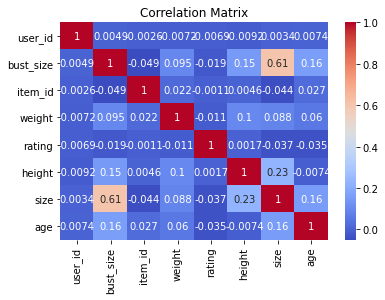

In [40]:
#Exploring relationships between columns using a correlation matrix.
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

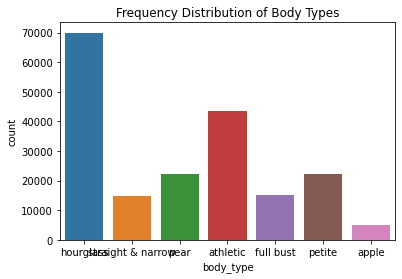

In [36]:
#Exploring the distribution of column 'body_type' using bar plot.

sns.countplot(x='body_type', data=df)
plt.title('Frequency Distribution of Body Types')
plt.show()

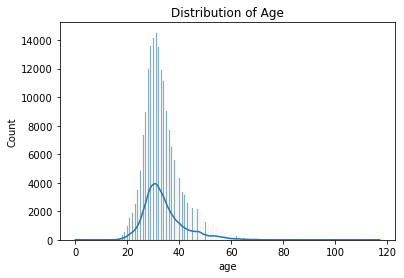

In [39]:
#Visualizing the distribution of 'age' using histograms or kernel density plots.

sns.histplot(df['age'], kde=True)
plt.title('Distribution of Age')
plt.show()

The histogram shows that majoority are between the ages of 20 - 40 years old.

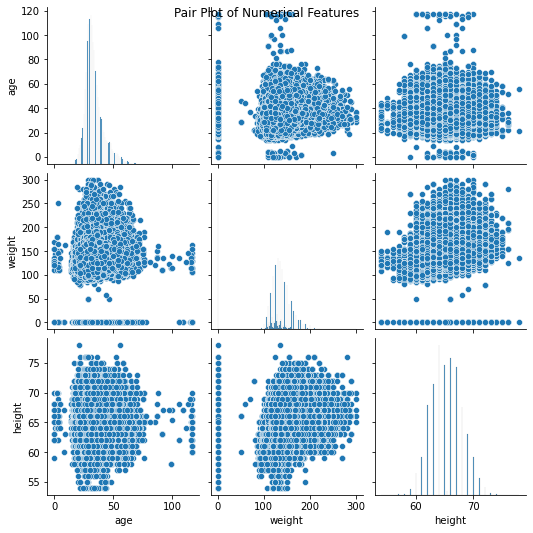

In [41]:
# Visualizing relationships between 'Age',' weight' and 'height' columns
sns.pairplot(df[['age', 'weight', 'height']])
plt.suptitle('Pair Plot of Numerical Features')
plt.show()

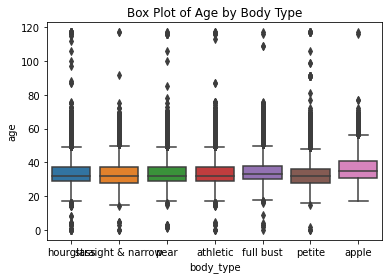

In [42]:
#Checking for outliers and comparing distributions using box plots.


sns.boxplot(x='body_type', y='age', data=df)
plt.title('Box Plot of Age by Body Type')
plt.show()

There are outliers especially at age 120 years for the columns weight, full bust and apple body_type.

# 3. Feature Engineering

In [45]:
df['review_date'] = pd.to_datetime(df['review_date'])

# Extract year, month, and day features
df['review_year'] = df['review_date'].dt.year
df['review_month'] = df['review_date'].dt.month
df['review_day'] = df['review_date'].dt.day

# Drop the original 'review_date' column if needed
# df = df.drop(columns=['review_date'])

# Display the updated DataFrame
df[['review_date', 'review_year', 'review_month', 'review_day']]

,review_date,review_year,review_month,review_day
0,2016-04-20,2016,4,20
1,2013-06-18,2013,6,18
2,2015-12-14,2015,12,14
3,2014-02-12,2014,2,12
4,2016-09-26,2016,9,26
...,...,...,...,...
192447,2016-05-18,2016,5,18
192448,2016-09-30,2016,9,30
192449,2016-03-04,2016,3,4
192450,2015-11-25,2015,11,25


In [46]:
# Using pandas get_dummies for one-hot encoding
df_encoded = pd.get_dummies(df, columns=['fit', 'rented_for', 'body_type', 'category'], prefix=['fit', 'rented_for', 'body_type', 'category'])

In [47]:
df_encoded

,user_id,bust_size,item_id,weight,rating,review_text,review_summary,height,size,age,...,category_tank,category_tee,category_tight,category_top,category_trench,category_trouser,category_trousers,category_tunic,category_turtleneck,category_vest
0,420272,34.000000,2260466,137.0,10.0,An adorable romper! Belt and zipper were a lit...,So many compliments!,68.0,14,28.0,...,0,0,0,0,0,0,0,0,0,0
1,273551,34.000000,153475,132.0,10.0,I rented this dress for a photo shoot. The the...,I felt so glamourous!!!,66.0,12,36.0,...,0,0,0,0,0,0,0,0,0,0
2,360448,34.201278,1063761,0.0,10.0,This hugged in all the right places! It was a ...,It was a great time to celebrate the (almost) ...,64.0,4,116.0,...,0,0,0,0,0,0,0,0,0,0
3,909926,34.000000,126335,135.0,8.0,I rented this for my company's black tie award...,Dress arrived on time and in perfect condition.,65.0,8,34.0,...,0,0,0,0,0,0,0,0,0,0
4,151944,34.000000,616682,145.0,10.0,I have always been petite in my upper body and...,Was in love with this dress !!!,69.0,12,27.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192447,66386,34.000000,2252812,140.0,10.0,Fit like a glove!,LOVE IT!!! First Item Im thinking of buying!,69.0,8,42.0,...,0,0,0,0,0,0,0,0,0,0
192448,118398,32.000000,682043,100.0,10.0,The pattern contrast on this dress is really s...,LOVE it!,61.0,4,29.0,...,0,0,0,0,0,0,0,0,0,0
192449,47002,36.000000,683251,135.0,6.0,"Like the other DVF wraps, the fit on this is f...","Loud patterning, flattering fit",68.0,8,31.0,...,0,0,0,0,0,0,0,0,0,0
192450,961120,36.000000,126335,165.0,10.0,This dress was PERFECTION. it looked incredib...,loved this dress it was comfortable and photog...,66.0,16,31.0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
from sklearn.preprocessing import LabelEncoder

# Using scikit-learn's LabelEncoder for label encoding
label_encoder = LabelEncoder()

df['fit_encoded'] = label_encoder.fit_transform(df['fit'])
df['rented_for_encoded'] = label_encoder.fit_transform(df['rented_for'])
df['body_type_encoded'] = label_encoder.fit_transform(df['body_type'])
df['category_encoded'] = label_encoder.fit_transform(df['category'])

In [49]:
df

,fit,user_id,bust_size,item_id,weight,rating,rented_for,review_text,body_type,review_summary,...,size,age,review_date,review_year,review_month,review_day,fit_encoded,rented_for_encoded,body_type_encoded,category_encoded
0,fit,420272,34.000000,2260466,137.0,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,...,14,28.0,2016-04-20,2016,4,20,0,6,3,44
1,fit,273551,34.000000,153475,132.0,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,...,12,36.0,2013-06-18,2013,6,18,0,3,6,20
2,fit,360448,34.201278,1063761,0.0,10.0,party,This hugged in all the right places! It was a ...,hourglass,It was a great time to celebrate the (almost) ...,...,4,116.0,2015-12-14,2015,12,14,0,4,3,45
3,fit,909926,34.000000,126335,135.0,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,...,8,34.0,2014-02-12,2014,2,12,0,2,4,16
4,fit,151944,34.000000,616682,145.0,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,...,12,27.0,2016-09-26,2016,9,26,0,7,1,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192447,fit,66386,34.000000,2252812,140.0,10.0,work,Fit like a glove!,hourglass,LOVE IT!!! First Item Im thinking of buying!,...,8,42.0,2016-05-18,2016,5,18,0,8,3,26
192448,fit,118398,32.000000,682043,100.0,10.0,work,The pattern contrast on this dress is really s...,petite,LOVE it!,...,4,29.0,2016-09-30,2016,9,30,0,8,5,16
192449,fit,47002,36.000000,683251,135.0,6.0,everyday,"Like the other DVF wraps, the fit on this is f...",straight & narrow,"Loud patterning, flattering fit",...,8,31.0,2016-03-04,2016,3,4,0,1,6,16
192450,fit,961120,36.000000,126335,165.0,10.0,wedding,This dress was PERFECTION. it looked incredib...,pear,loved this dress it was comfortable and photog...,...,16,31.0,2015-11-25,2015,11,25,0,7,4,16


# 4. Building the Recommendation System